In [2]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("obesity_clear.csv")
df = df.head(485)

<Axes: xlabel='BMI', ylabel='Count'>

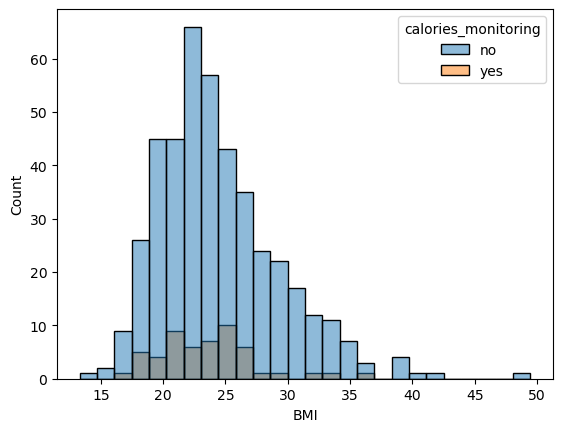

In [6]:
sns.histplot(data = df, x = 'BMI', hue = 'calories_monitoring')

In [13]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Height', 'Weight',
       'overweight_in_family', 'high_cal_food', 'vegetables_consumption',
       'number_of_main_meals', 'consumption_between_meals', 'is_smoking',
       'daily_water_consumption', 'calories_monitoring', 'physical_activity',
       'time_using_technology', 'alcohol_consumption',
       'prefered_transportation', 'BMI', 'BMI_classification'],
      dtype='object')

<Axes: xlabel='Height', ylabel='Weight'>

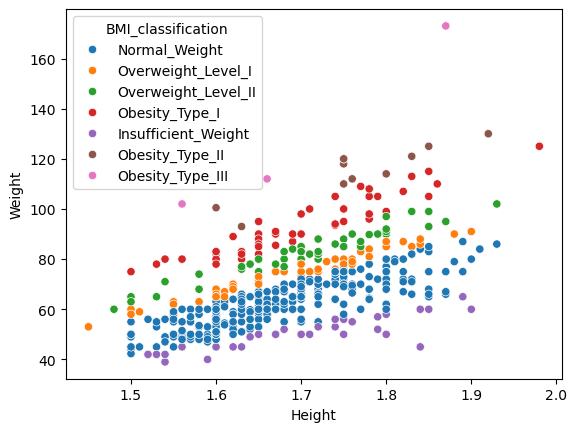

In [29]:
sns.scatterplot(data = df, x = 'Height', y='Weight',  hue = 'BMI_classification')

<Axes: xlabel='Age', ylabel='BMI'>

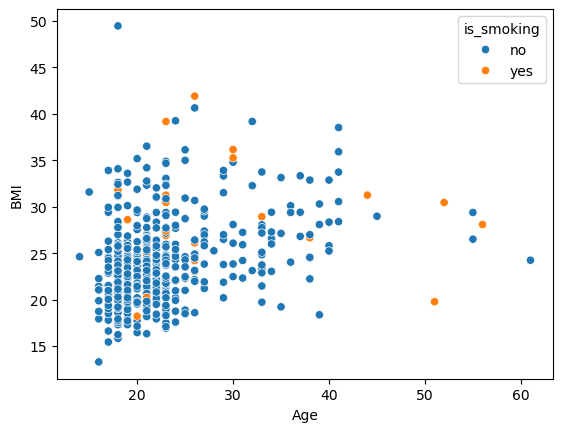

In [12]:
sns.scatterplot(data = df, x = 'Age', y='BMI', hue = 'is')

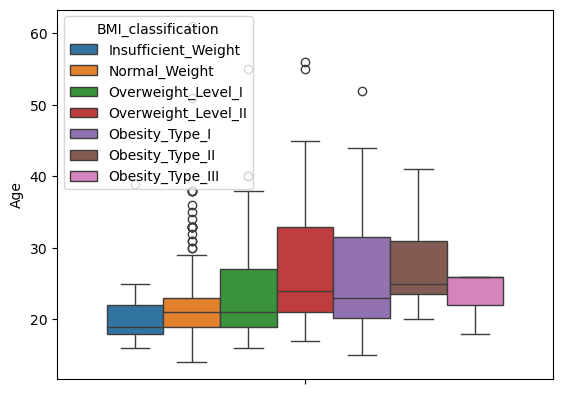

In [59]:
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II' , 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
plot = sns.boxplot(data=df, y='Age', hue='BMI_classification', hue_order=custom_order)



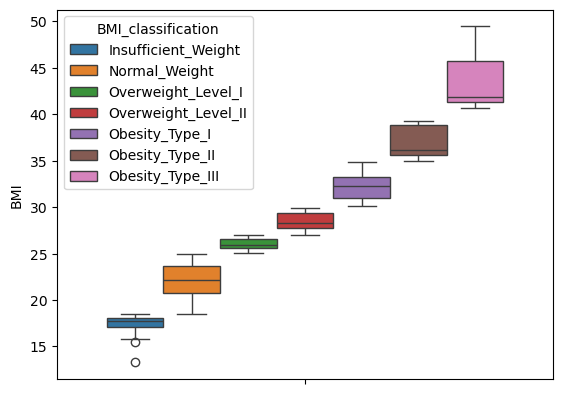

In [60]:
plot = sns.boxplot(data=df, y='BMI', hue='BMI_classification', hue_order=custom_order)


(<Figure size 1000x600 with 8 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >])

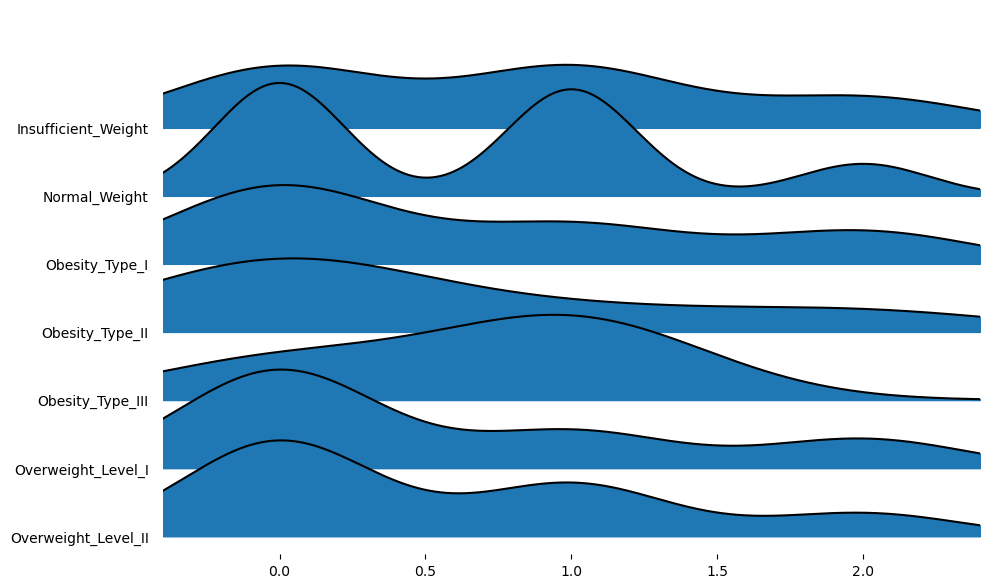

In [72]:
import joypy
from matplotlib import pyplot as plt
joypy.joyplot(data=df, by='BMI_classification', column='time_using_technology', figsize=(10,6))

/home/miloszg/anaconda3/envs/aiwd_env/lib/python3.11/site-packages/joypy/joyplot.py:173: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


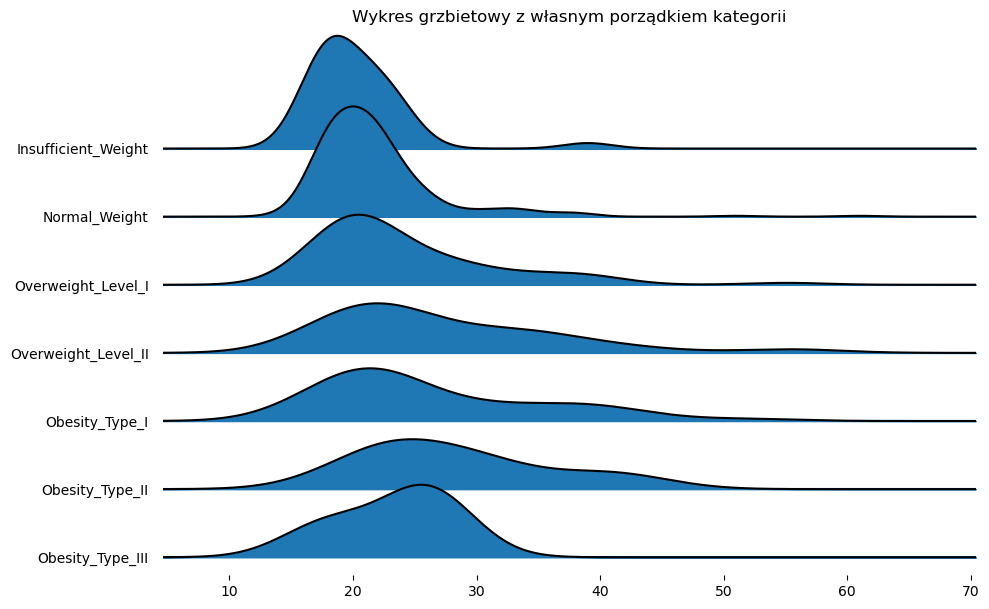

In [75]:
import joypy
from matplotlib import pyplot as plt
import pandas as pd

# Przykładowy custom order
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Ustawienie kolumny jako kategoria z własnym porządkiem
df['BMI_classification'] = pd.Categorical(
    df['BMI_classification'], 
    categories=custom_order, 
    ordered=True
)

# Posortowanie danych
df = df.sort_values('BMI_classification')

# Wykres grzbietowy
joypy.joyplot(
    data=df, 
    by='BMI_classification',  # Grupa według kategorii
    column='Age',  # Kolumna wartości
    figsize=(10, 6)
)

plt.title("Wykres grzbietowy z własnym porządkiem kategorii")
plt.show()


In [4]:
sns.scatterplot(x = 'BMI', y='Age')

ValueError: Could not interpret value `BMI` for `x`. Value is a string, but `data` was not passed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dane do wykresu (np. oceny różnych cech produktu)
labels = ['Jakość', 'Cena', 'Funkcjonalność', 'Design', 'Trwałość']
values = [8, 6, 7, 9, 8]  # Skala np. 1-10

# Tworzenie kątów dla osi
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # Powtórzenie pierwszej wartości, aby zamknąć kształt
angles += angles[:1]

# Tworzenie wykresu radarowego
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)  # Wypełnienie
ax.plot(angles, values, color='blue', linewidth=2)  # Linie
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Wykres Radarowy - Oceny Produktu")
plt.show()

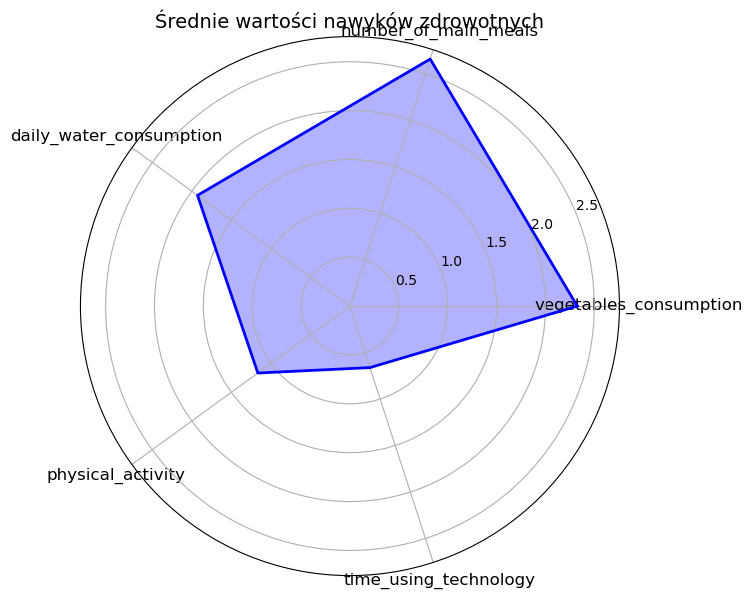

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Wybór cech do wizualizacji
features = ['vegetables_consumption', 'number_of_main_meals', 'daily_water_consumption', 
            'physical_activity', 'time_using_technology']

# Obliczenie średnich wartości dla tych cech
mean_values = df[features].mean().tolist()

# Tworzenie kątów dla osi
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
mean_values += mean_values[:1]  # Powtórzenie pierwszej wartości, aby zamknąć kształt
angles += angles[:1]

# Tworzenie wykresu radarowego
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
ax.fill(angles, mean_values, color='blue', alpha=0.3)
ax.plot(angles, mean_values, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=12)

plt.title("Średnie wartości nawyków zdrowotnych", fontsize=14)
plt.show()
